In [3]:
%matplotlib inline

# load modules
import numpy as np
import SimpleITK as sitk

import sys
sys.path.append('./src')
import volumerendering
import imagedisplay

# Import dataset

In [4]:
dataset = np.load("../data/working_data/pct_unet_all_2016_2017_complete/data_set.npz")
# To access the files, write 
# dataset['ct_inputs']
# Or : clinical_inputs, ids, included_subjects, params, lesion_GT, brain_masks

In [5]:
patient_nb = 0

In [6]:
np_image = dataset['ct_inputs'][patient_nb] # Change the patient's number

## Test on one patient

In [7]:
np_image.shape

(79, 95, 79, 4)

In [8]:
np_image_ax0 = np_image[35,:,:,:]

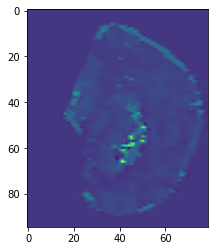

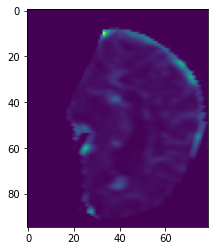

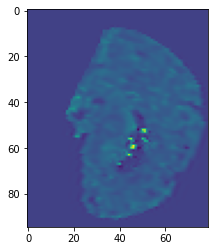

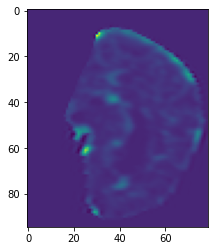

In [9]:
import matplotlib.pyplot as plt
for i in range(4):
    plt.figure()
    plt.imshow(np_image_ax0[:,:,i])

d:\python\anaconda3\envs\pctnet\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


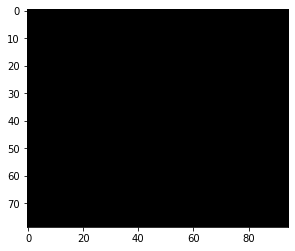

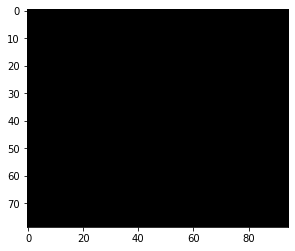

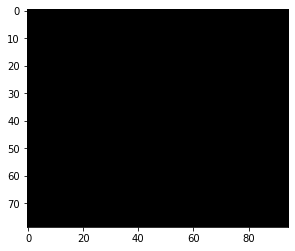

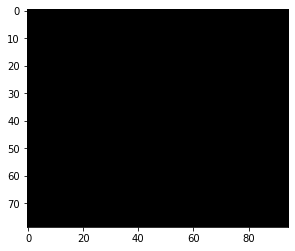

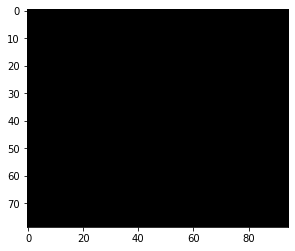

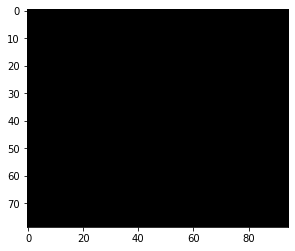

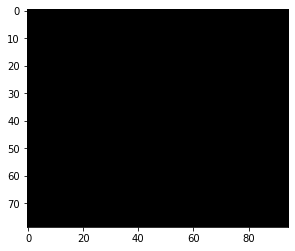

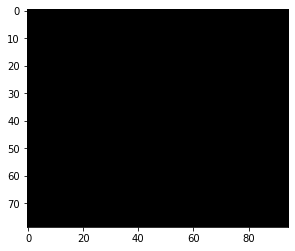

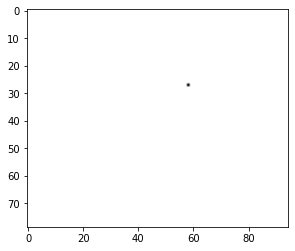

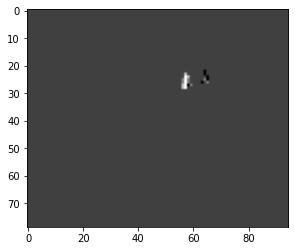

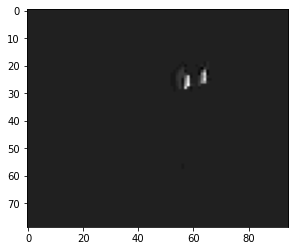

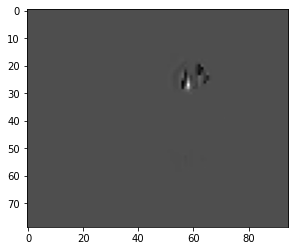

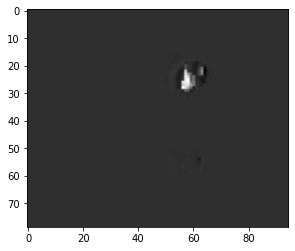

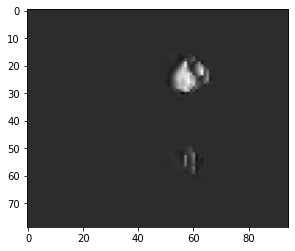

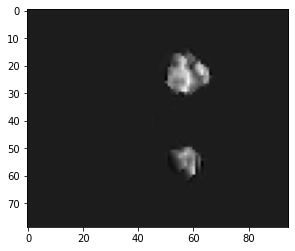

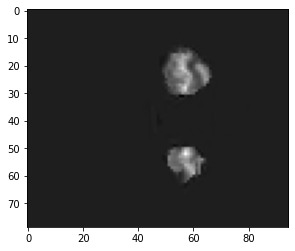

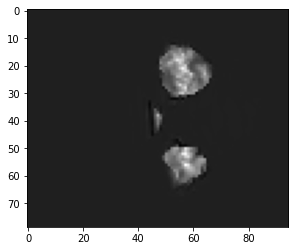

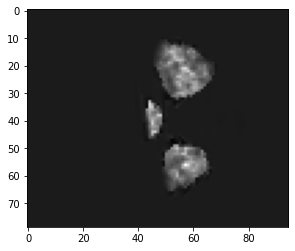

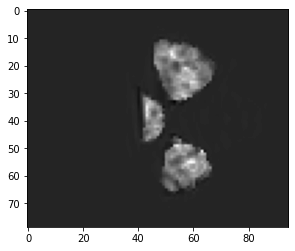

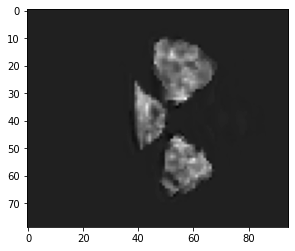

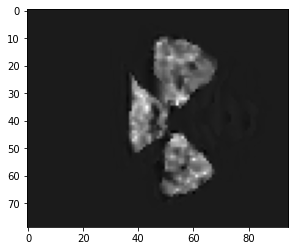

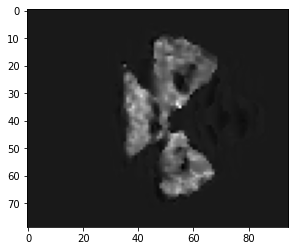

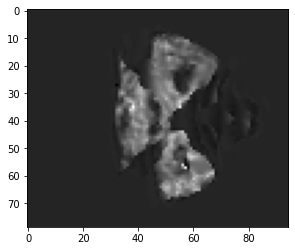

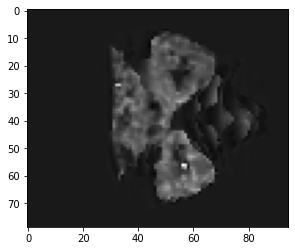

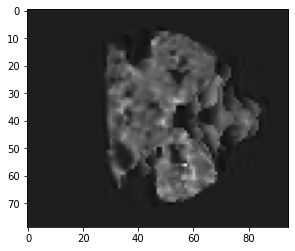

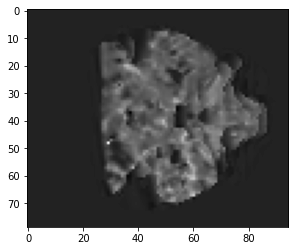

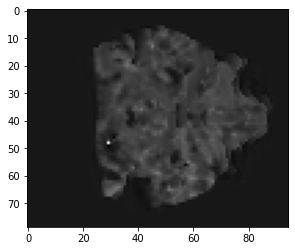

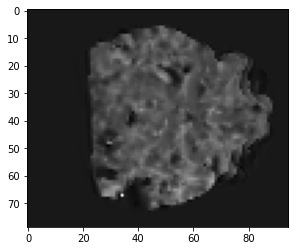

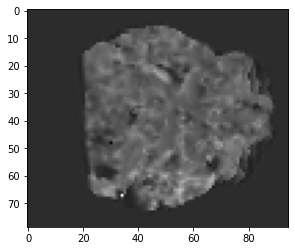

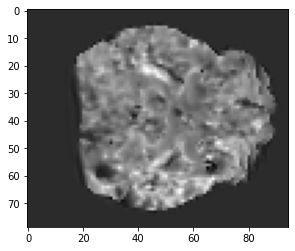

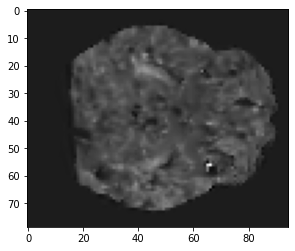

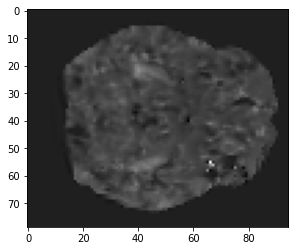

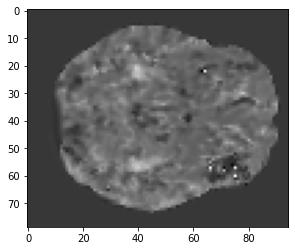

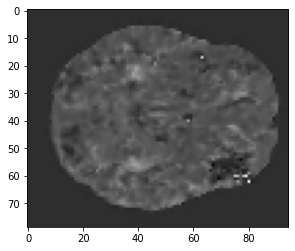

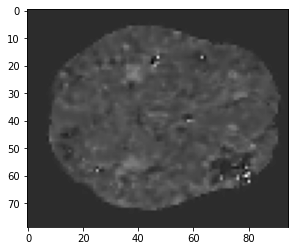

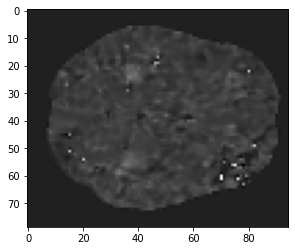

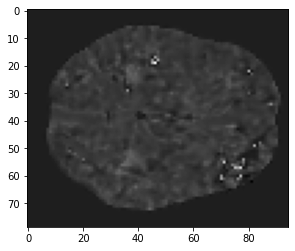

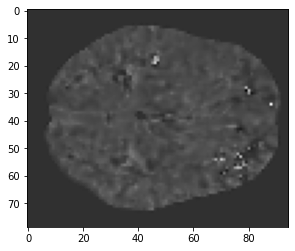

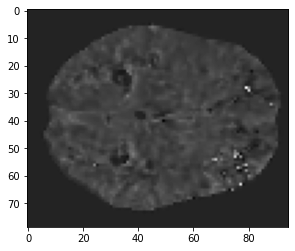

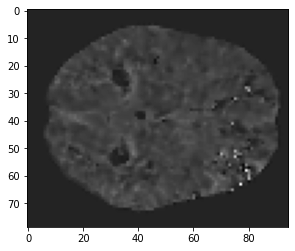

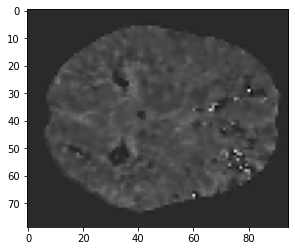

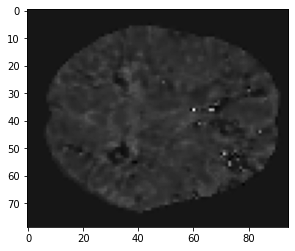

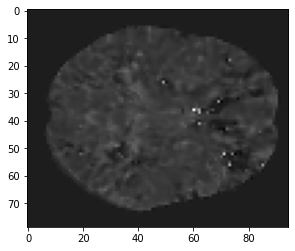

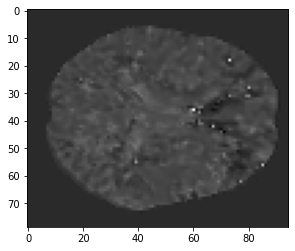

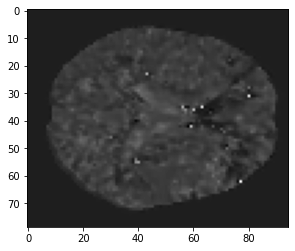

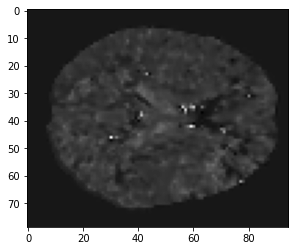

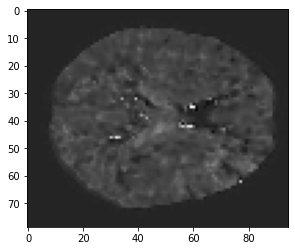

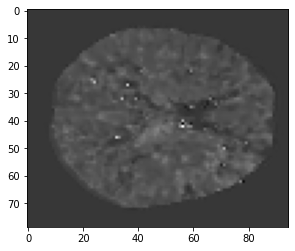

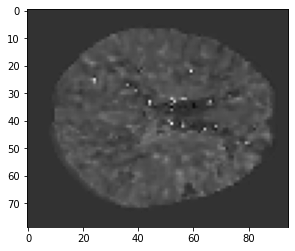

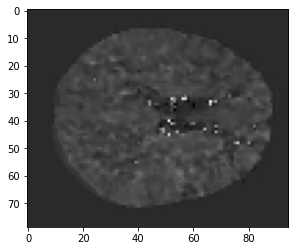

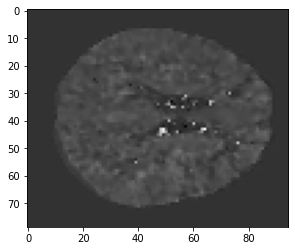

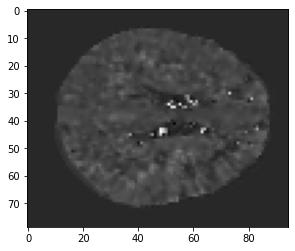

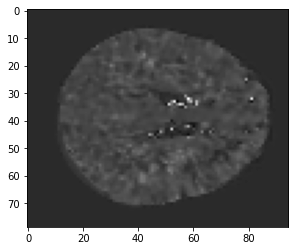

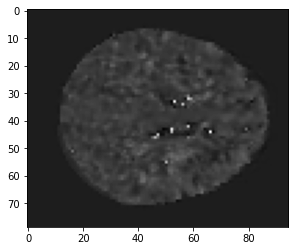

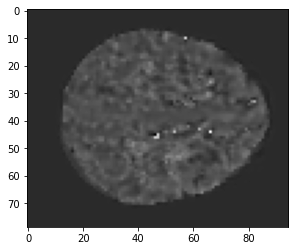

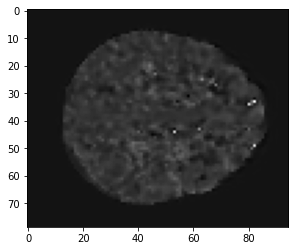

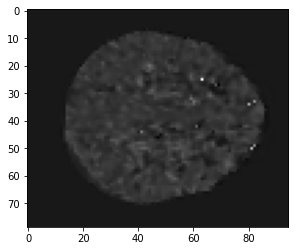

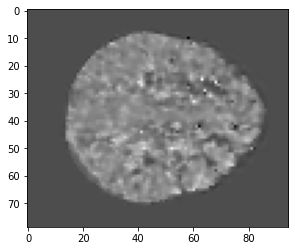

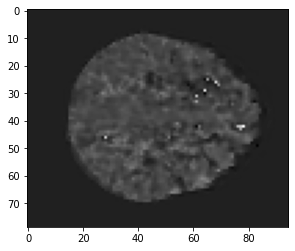

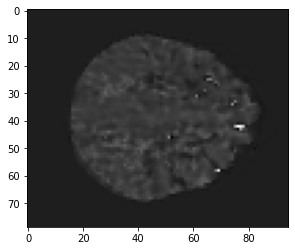

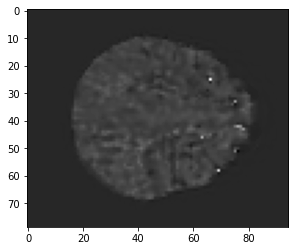

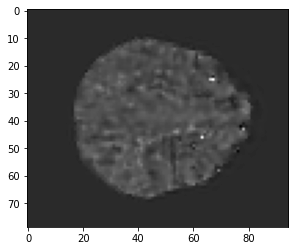

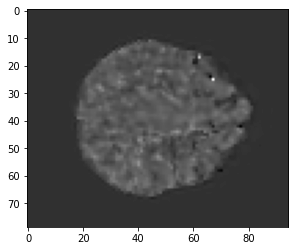

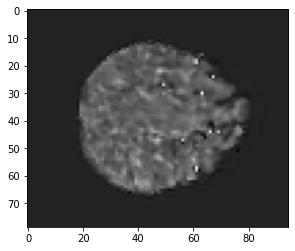

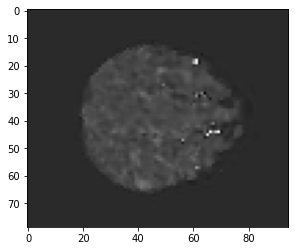

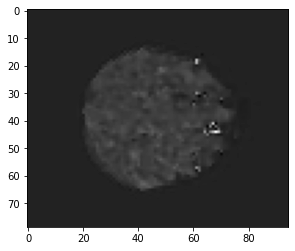

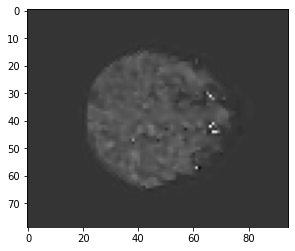

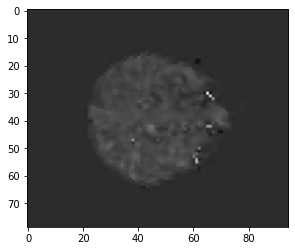

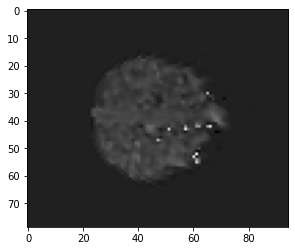

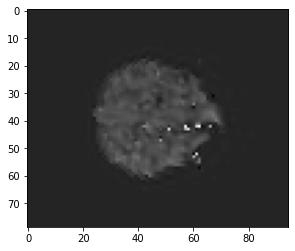

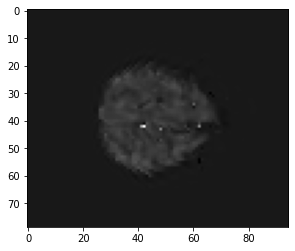

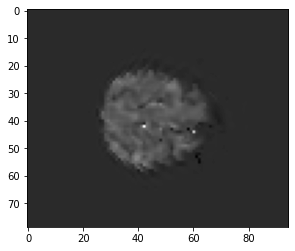

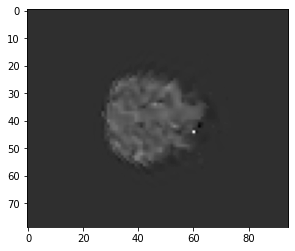

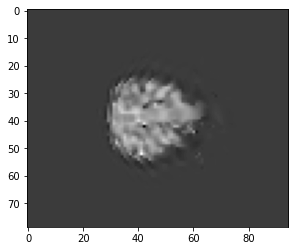

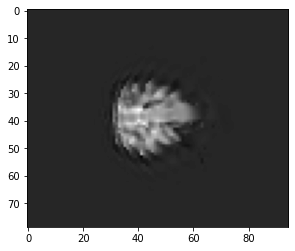

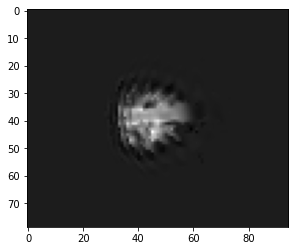

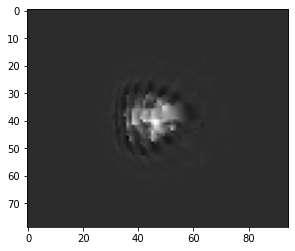

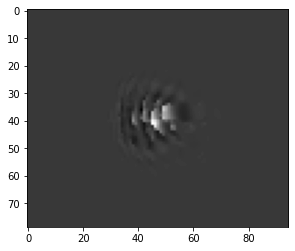

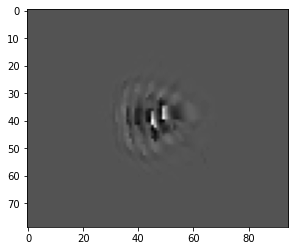

In [10]:
import matplotlib.pyplot as plt
for i in range(np_image.shape[2]):
    plt.figure()
    plt.imshow(np_image[:,:,i,2], cmap='gray')

In [11]:
np.min(np_image)

-14.659999672323465

In [12]:
# Read the image
image = sitk.GetImageFromArray(np_image[:,:,:,2]) #sitk.ReadImage('../data/working_data/pct_unet_all_2016_2017/rescaled_data_set.npz' )

# Image dimensions (width,height,depth)
imageSize = image.GetSize()

### Projection of the volume onto a 2D plane

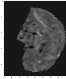

In [13]:
# Several 2-D projections along the same axis
imagedisplay.myshow3d( image,
                       yslices=range(50,imageSize[2]-50,12),
                       zslices=range(50,imageSize[2]-50,12), 
                       dpi=10 )

### Multi-plane projection and image labels

In [14]:
imageSize[0]/2

39.5

In [15]:
np_mask = dataset['lesion_GT'][patient_nb] # Change the patient's number

In [16]:
np_mask.shape

(79, 95, 79)

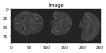

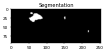

In [17]:
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['figure.dpi'] = 200
# Read the image
#image = sitk.ReadImage('../sample_data/image.nii.gz')

# Image dimensions (width,height,depth)
imageSize = image.GetSize()

# 3D planar view
slices =[ image[imageSize[0]//2,:,::-1],
          image[:,imageSize[1]//2,::-1], 
          image[:,:,imageSize[2]//2] ]
imagedisplay.myshow(sitk.Tile(slices, [3,1]), title="Image", dpi=30)


# Load the annotations (gray matter, white matter, csf)
img_labels = sitk.GetImageFromArray(np_mask[:,:,:]) #sitk.ReadImage('../sample_data/labelmap.nii.gz')

# Display the annotations
slices = [ img_labels[imageSize[0]//2,:,::-1],
           img_labels[:,imageSize[1]//2,::-1],
           img_labels[:,:,imageSize[2]//2] ]
imagedisplay.myshow(sitk.Tile(slices, [3,1]), title="Segmentation", dpi=30)

### Volume rendering

In [1]:
# load the second image
image2 = image # sitk.ReadImage('../sample_data/image2.nii.gz')
data = sitk.GetArrayFromImage(image2) # numpy array

# converting the pixel type to uint8 and rescaling
data = data.astype('float')
data /= data.max()
data *= 255
data = data.astype('uint8')

# intensity window and opacity value
win_b = 39.0
win_e = 72.0
win_m = (win_b+win_e)/2
opacity = 0.2

# volume rendering transfer function
tf = [ [0,0,0,0,0],
       [win_b,0,0,0,0],
       [win_m,1,1,1,0.2],
       [win_e,1,1,1,0],
       [data.max(),1,1,1,0] ]

# perform volume rendering (a new window should be opened - vtk inline display is not supported)
actor_list = volumerendering.volumeRender( data, tf=tf, spacing=image2.GetSpacing() )
volumerendering.vtk_basic( actor_list, embed=True ) # embed = True: displays a screenshot in the notebook
                                                    # embed = False: interactive VTK window

ModuleNotFoundError: No module named 'volumerendering'

In [78]:
pip freeze

alabaster==0.7.12
appnope==0.1.0
astroid==2.4.1
atomicwrites==1.4.0
attrs==19.3.0
autopep8==1.5.3
Babel==2.8.0
backcall==0.1.0
bcrypt==3.1.7
bleach==3.1.5
certifi==2020.4.5.1
cffi==1.14.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.4.1
colorama==0.4.3
cryptography==2.9.2
cycler==0.10.0
decorator==4.4.2
defusedxml==0.6.0
diff-match-patch==20181111
docutils==0.16
dominate==2.5.1
entrypoints==0.3
et-xmlfile==1.0.1
flake8==3.8.2
h5py==2.10.0
helpdev==0.7.1
idna==2.9
imageio==2.8.0
imagesize==1.2.0
importlib-metadata==1.6.0
intervaltree==3.0.2
ipykernel==5.3.0
ipython==7.15.0
ipython-genutils==0.2.0
ipywidgets==7.5.1
isort==4.3.21
jdcal==1.4.1
Note: you may need to restart the kernel to use updated packages.jedi==0.15.2
Jinja2==2.11.2

joblib==0.15.1
jsonpatch==1.25
jsonpointer==2.0
jsonschema==3.2.0
jupyter==1.0.0
jupyter-client==6.1.3
jupyter-console==6.1.0
jupyter-core==4.6.3
keyring==21.2.1
kiwisolver==1.2.0
lazy-object-proxy==1.4.3
MarkupSafe==1.1.1
matplotlib==3.2.1
mccabe==0.6.1
mistu

In [18]:
vars(vtkmodules.all)

NameError: name 'vtkmodules' is not defined